In [153]:
import pandas as pd

df = pd.read_csv(r"C:\Users\nbwan\Python\Data Science\telco.csv")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['tenure'] = df['tenure'].astype(float)
df['Churn'] = df['Churn'].map({"Yes": 1, "No": 0})
df['Churn'] = df['Churn'].astype(float)
df.dropna(inplace=True)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0.0
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0.0
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1.0
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0.0
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0.0
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0.0
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0.0
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1.0


In [154]:
df['TotalCharges'].value_counts()

TotalCharges
20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: count, Length: 6530, dtype: int64

In [155]:
df['gender'] = df['gender'].map({"Male": 1, "Female": 0})

df['Partner'] = df['Partner'].map({"Yes": 1, "No": 0})

df['PhoneService'] = df['PhoneService'].map({"Yes": 1, "No": 0})

df['PaperlessBilling'] = df['PaperlessBilling'].map({"Yes": 1, "No": 0})

df['Dependents'] = df['Dependents'].map({"Yes": 1, "No": 0})

df['Uses_Streaming_Services'] = ((df['StreamingTV'] == 'Yes') | (df['StreamingMovies'] == 'Yes')).astype("int64")


In [156]:
columns_to_encode = ['MultipleLines','InternetService', 'StreamingMovies','Contract','PaymentMethod']

for column in columns_to_encode:
    dummies = pd.get_dummies(df[column], prefix=column)

    df = pd.concat([df, dummies], axis=1)

    df.drop(column, axis=1, inplace=True)


for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype('int64')

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1.0,0,No,Yes,No,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34.0,1,Yes,No,Yes,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2.0,1,Yes,Yes,No,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45.0,0,Yes,No,Yes,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2.0,1,No,No,No,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24.0,1,Yes,No,Yes,...,0,0,1,0,1,0,0,0,0,1
7039,2234-XADUH,0,0,1,1,72.0,1,No,Yes,Yes,...,0,0,1,0,1,0,0,1,0,0
7040,4801-JZAZL,0,0,1,1,11.0,0,Yes,No,No,...,1,0,0,1,0,0,0,0,1,0
7041,8361-LTMKD,1,1,1,0,4.0,1,No,No,No,...,1,0,0,1,0,0,0,0,0,1


In [157]:
df.dtypes

customerID                                  object
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
OnlineSecurity                              object
OnlineBackup                                object
DeviceProtection                            object
TechSupport                                 object
StreamingTV                                 object
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                      float64
Uses_Streaming_Services                      int64
MultipleLines_No                             int64
MultipleLines_No phone service               int64
MultipleLines_Yes              

In [158]:
df.isnull().sum()

customerID                                 0
gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
Uses_Streaming_Services                    0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetSe

In [159]:
df['Churn'].value_counts()

Churn
0.0    5163
1.0    1869
Name: count, dtype: int64

In [160]:
df['tenure'].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [161]:
df['MonthlyCharges'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

In [162]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

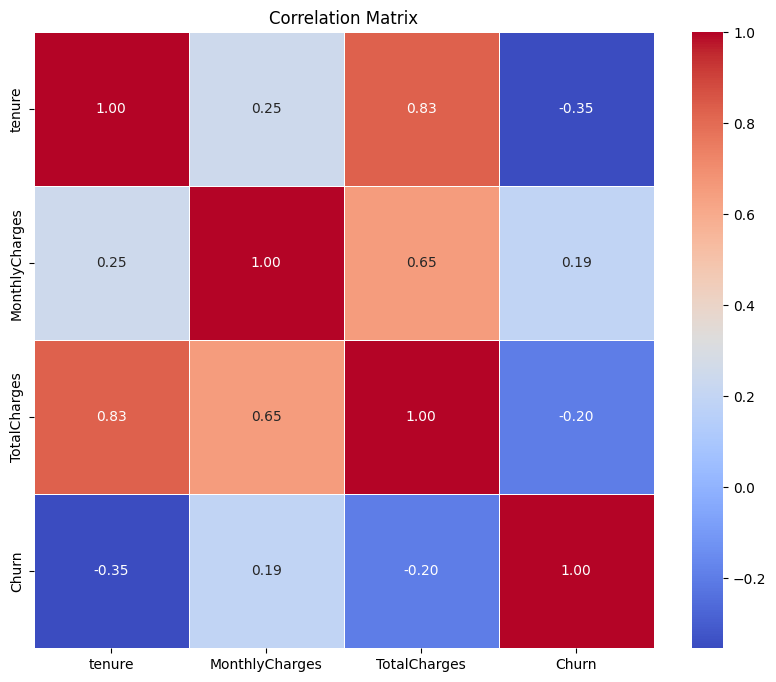

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt
correaltion_matrix = df[['tenure', 'MonthlyCharges','TotalCharges','Churn']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correaltion_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [164]:
df['tenure'] = df['tenure'].astype("int64")

In [165]:
modeldf = df[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','Uses_Streaming_Services','MultipleLines_No','MultipleLines_No phone service','MultipleLines_Yes','InternetService_DSL','InternetService_Fiber optic','InternetService_No',
              'Contract_Month-to-month','Contract_One year','Contract_Two year','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check','MonthlyCharges','TotalCharges','Churn']]

In [166]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


XSample = modeldf.drop('Churn', axis=1)
ySample = modeldf['Churn']

XSample_train, XSample_test, ySample_train, ySample_test = train_test_split(XSample, ySample, test_size=0.2, random_state=42)


In [167]:
XSample_train.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
Uses_Streaming_Services                      int64
MultipleLines_No                             int64
MultipleLines_No phone service               int64
MultipleLines_Yes                            int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No                           int64
Contract_Month-to-month                      int64
Contract_One year                            int64
Contract_Two year                            int64
PaymentMethod_Bank transfer (automatic)      int64
PaymentMethod_Credit card (automatic)        int64
PaymentMethod_Electronic check               int64
PaymentMethod_Mailed check     

In [168]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(XSample_train, ySample_train)

print("Original dataset shape:", ySample_train.value_counts())
print("Resampled dataset shape:", y_resampled.value_counts())


Original dataset shape: Churn
0.0    4130
1.0    1495
Name: count, dtype: int64
Resampled dataset shape: Churn
1.0    4130
0.0    4130
Name: count, dtype: int64


In [170]:
X_resampled_df = pd.DataFrame(X_resampled, columns=XSample_train.columns)

y_resampled_series = pd.Series(y_resampled)

resampled_df = pd.concat([X_resampled_df, y_resampled_series.rename('Churn')], axis=1)

resampled_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Uses_Streaming_Services,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,43,0,1,0,1,0,...,1,0,0,1,0,0,0,49.050000,2076.200000,1.0
1,1,0,0,0,3,1,1,1,0,0,...,1,0,0,0,1,0,0,53.400000,188.700000,1.0
2,0,0,1,0,55,1,0,0,0,1,...,1,0,0,0,0,1,0,77.750000,4458.150000,1.0
3,1,0,1,1,45,1,0,1,0,0,...,0,0,1,1,0,0,0,54.650000,2553.700000,0.0
4,0,0,1,1,55,1,1,0,0,1,...,0,1,0,0,0,0,1,100.900000,5448.600000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8255,1,0,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,1,19.579712,19.579712,1.0
8256,0,0,0,0,60,1,1,0,0,1,...,0,1,0,0,0,0,0,105.357721,6274.134111,1.0
8257,0,0,0,0,37,1,1,0,0,1,...,1,0,0,0,0,0,0,97.689649,3623.489068,1.0
8258,0,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,1,0,90.154127,90.154127,1.0


In [174]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X_resampled_df, y_resampled, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))



Accuracy: 0.85
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       822
         1.0       0.86      0.83      0.85       830

    accuracy                           0.85      1652
   macro avg       0.85      0.85      0.85      1652
weighted avg       0.85      0.85      0.85      1652



C:\Users\nbwan\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [16:40:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                                         Importance
Contract_Month-to-month                    0.272470
Contract_One year                          0.163319
Contract_Two year                          0.099267
InternetService_No                         0.078948
MultipleLines_No phone service             0.078442
PaymentMethod_Bank transfer (automatic)    0.042494
InternetService_Fiber optic                0.033086
Dependents                                 0.032774
PaymentMethod_Credit card (automatic)      0.024878
PaymentMethod_Mailed check                 0.023905
PaymentMethod_Electronic check             0.022030
MultipleLines_Yes                          0.021497
MultipleLines_No                           0.019605
InternetService_DSL                        0.018614
PhoneService                               0.014947
tenure                                     0.011746
MonthlyCharges                             0.008449
TotalCharges                               0.007175
gender      

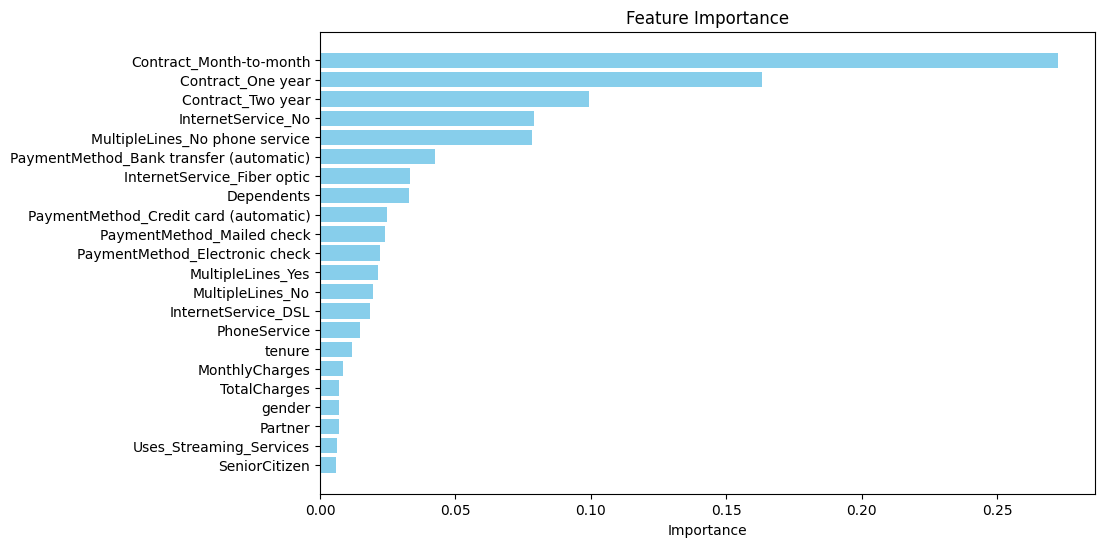

In [175]:
import matplotlib.pyplot as plt
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame(importances, index=XSample_train.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To display the highest importance on top
plt.show()